[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_F2GBLxlYHGhP3j3MJR0yB5gu2e2qAsv?usp=sharing)

# Decision Trees in sklearn

In this section, you'll use decision trees to fit a given sample dataset.

Before you do that, let's go over the tools required to build this model.

For your decision tree model, you'll be using scikit-learn's Decision Tree Classifier class. This class provides the functions to define and fit the model to your data.

>>> from sklearn.tree import DecisionTreeClassifier

>>> model = DecisionTreeClassifier()

>>> model.fit(x_values, y_values)

In the example above, the model variable is a decision tree model that has been fitted to the data x_values and y_values. Fitting the model means finding the best tree that fits the training data. Let's make two predictions using the model's predict() function.

>>> print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))

>>> [[ 0., 1.]]

The model returned an array of predictions, one prediction for each input array. The first input, [0.2, 0.8], got a prediction of 0.. The second input, [0.5, 0.4], got a prediction of 1..

## Hyperparameters

When we define the model, we can specify the hyperparameters. In practice, the most common ones are

- max_depth: The maximum number of levels in the tree.

- min_samples_leaf: The minimum number of samples allowed in a leaf.

- min_samples_split: The minimum number of samples required to split an internal node.

For example, here we define a model where the maximum depth of the trees max_depth is 7, and the minimum number of elements in each leaf min_samples_leaf is 10.

>>> model = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)

## Decision Tree Quiz

In this quiz, you'll be given the following sample dataset, and your goal is to define a model that gives 100% accuracy on it.

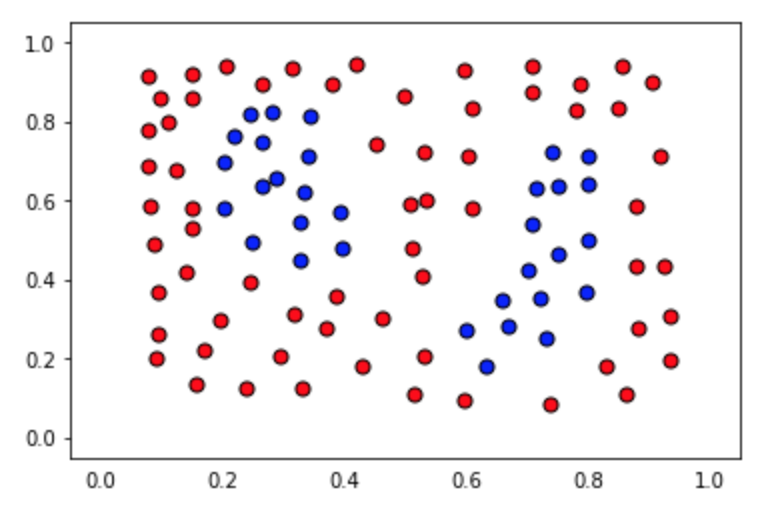

The data file can be found under the "data.csv" tab in the quiz below. It includes three columns, the first 2 comprising of the coordinates of the points, and the third one of the label.

The data will be loaded for you, and split into features X and labels y.

You'll need to complete each of the following steps:

1. Build a decision tree model

- Create a decision tree classification model using scikit-learn's DecisionTreeClassifier and assign it to the variablemodel.

2. Fit the model to the data

- You won't need to specify any of the hyperparameters, since the default ones will yield a model that perfectly classifies the training data. However, we encourage you to play with hyperparameters such as max_depth and min_samples_leaf to try to find the simplest possible model.

3. Predict using the model

- Predict the labels for the training set, and assign this list to the variable y_pred.

4. Calculate the accuracy of the model

- For this, use the function sklearn function accuracy_score. A model's accuracy is the fraction of all data points that it correctly classified.
- When you hit Test Run, you'll be able to see the boundary region of your model, which will help you tune the correct parameters, in case you need them.

Note: This quiz requires you to find an accuracy of 100% on the training set. This is like memorizing the training data! A model designed to have 100% accuracy on training data is unlikely to generalize well to new data. If you pick very large values for your parameters, the model will fit the training set very well, but may not generalize well. Try to find the smallest possible parameters that do the job—then the model will be more likely to generalize well. (This aspect of the exercise won't be graded.)

## Downloading Dataset

In [1]:
# Download Dataset
!gdown --id 1ZUVmlAPcFlm3TIko7zF-akcv8MsM7pEl

Downloading...
From: https://drive.google.com/uc?id=1ZUVmlAPcFlm3TIko7zF-akcv8MsM7pEl
To: /content/data.csv
100% 1.81k/1.81k [00:00<00:00, 1.59MB/s]


# Quiz

In [ ]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = None

# TODO: Fit the model.

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = None

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = None

In [ ]:
print('The accuracy is: ', acc)
print('Great Job')

## Solution

In [3]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)

In [5]:
print('The accuracy is: ', acc)
print('Great Job')

The accuracy is:  1.0
Great Job


## Plotting

No handles with labels found to put in legend.


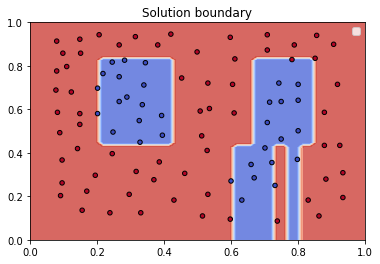

In [7]:
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='black')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
plt.xlim([0, 1])
plt.ylim([0, 1])
ax.set_title("Solution boundary")
ax.legend()
plt.show()